# Predicting the popularity of the future k-pop idol:

### 1.Data Analysis
### 2.Data Preprocessing
### 3.Feature Engineering
### 4.Conclusion

In [1]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sns

#read dataset
data = pd.read_csv("datasets/kpopdataset.csv",sep="\t",delimiter = ";")
test = pd.read_csv("datasets/testdata.csv",sep="\t",delimiter = ";")

# 1. Data Analysis

In [2]:
data.head()


,rank,name,agency,real name,group,age,height,weight,blood type,origin,country,position,industry,gender,curr date,birth date
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Seo Jin Ah,Berry Chu,37.0,NaN,NaN,NaN,Seoul,South Korea,"Leader, Vocalist",K-pop,Female,23.04.2020,29.04.1983
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Kim Ha Yul,Berry Chu,33.0,NaN,NaN,NaN,Seoul,South Korea,Vocalist,K-pop,Female,23.04.2020,18.10.1986
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Han Ji Eun,Berry Chu,33.0,NaN,NaN,NaN,Seoul,South Korea,Vocalist,K-pop,Female,23.04.2020,12.01.1987
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Heo Yun Mi,Berry Chu,32.0,NaN,NaN,NaN,Incheon,South Korea,Vocalist,K-pop,Female,23.04.2020,23.03.1988
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Kim Haum,Berry Chu,29.0,NaN,NaN,NaN,Seoul,South Korea,"Vocalist, Maknae",K-pop,Female,23.04.2020,20.10.1990


In [3]:
test.head()

,rank,name,agency,real name,group,age,height,weight,blood type,origin,country,position,industry,gender
0,1,Peak,Chandelier Music,Kongthap Peak,NaN,19,186,71,A,Thai,Thailand,NaN,K-pop,Male
1,2,Son Dong Pyo,DSP Media,Son Dong Pyo,NaN,22,166,48,O,Korean,South Korea,"Vocalist, dancer",K-pop,Male
2,3,Lee Jun Hyuk,DSP Media,Lee Jun Hyuk,NaN,19,180,63,B,Korean,South Korea,"Rapper, Vocalist, Dancer",K-pop,Male
3,4,Lee Hwan,DSP Media,Lee Hwan,NaN,21,169,53,A,Korean,South Korea,Vocalist,K-pop,Male
4,5,Yoon Seo Hyeung,&August,Yoon Seo Hyeung,NaN,21,163,44,B,Korean,South Korea,Musical,K-pop,Female


In [4]:
data.shape

(1901, 16)

In [5]:
test.shape

(100, 14)

In [6]:
#missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        1901 non-null   int64  
 1   name        1901 non-null   object 
 2   agency      1874 non-null   object 
 3   real name   1566 non-null   object 
 4   group       1901 non-null   object 
 5   age         1725 non-null   float64
 6   height      1603 non-null   float64
 7   weight      1253 non-null   float64
 8   blood type  1349 non-null   object 
 9   origin      686 non-null    object 
 10  country     1895 non-null   object 
 11  position    1836 non-null   object 
 12  industry    1901 non-null   object 
 13  gender      1901 non-null   object 
 14  curr date   1901 non-null   object 
 15  birth date  1725 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 237.8+ KB


In [7]:
#determine the amount of missing values
data.isnull().sum()

rank             0
name             0
agency          27
real name      335
group            0
age            176
height         298
weight         648
blood type     552
origin        1215
country          6
position        65
industry         0
gender           0
curr date        0
birth date     176
dtype: int64

In [8]:
test.isnull().sum()

rank            0
name            0
agency          0
real name       1
group         100
age             0
height          0
weight          0
blood type      0
origin          0
country         0
position       19
industry        0
gender          0
dtype: int64

In [9]:
#drop unnecessary columns
to_drop = ['real name', 'origin', 'industry', 'curr date', 'birth date']
data = data.drop(to_drop, axis=1)

In [10]:
#read new dataset of popular groups
popular = pd.read_csv("datasets/bestkpopgroups.csv",sep="\t",delimiter = ";")
popular.head()

,Rank,Group,Label
0,1,BTS (Bangtan Boys),Big Hit Entertainment
1,2,Black Pink,YG Entertaiment
2,3,GOT7,JYP Entertainment
3,4,EXO,SM Entertainment
4,5,Stray Kinds,JYP Entertainment


In [11]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    100 non-null    int64 
 1   Group   100 non-null    object
 2   Label   100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


# 2. Data preprocessing

In [12]:
#add new column 'popularity'
data['popularity'] = 0
data.head()

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",Female,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",Female,0


In [13]:
#compare two datasets
#if group contains in dataset with popular group
#then we equal values of column popularity to 1
for index1, row1 in data.iterrows():
    for index2, row2 in popular.iterrows():
        if(row1['group']==row2['Group']):
            data.at[index1, 'popularity']=1

In [14]:
data.head(30)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",Female,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",Female,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,34.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
6,7,Vanya,Zenith Media Contents,Z-Girls,23.0,159.0,50.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",Female,0
7,8,Roy,Zenith Media Contents,Z-Boys,23.0,NaN,NaN,NaN,Vietnam,Main Vocalist,Male,0
8,9,Josh,Zenith Media Contents,Z-Boys,22.0,174.0,NaN,NaN,Philippines,"Main Dancer, Lead Vocalist",Male,0
9,10,Sid,Zenith Media Contents,Z-Boys,20.0,NaN,NaN,NaN,India,Main Vocalist,Male,0


### Gender

In [15]:
#gender 
#set male to 0 and female to 1
gender_map = {"Male": 0, "Female": 1}
data['gender']=data['gender'].map(gender_map)

In [16]:
gender_map1 = {"Male": 0, "Female": 1}
test['gender']=test['gender'].map(gender_map1)

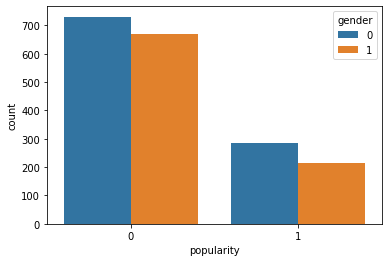

In [17]:
#bar chart for gender category
sns.countplot(x='popularity', hue='gender', data=data)

 We can see that male groups more popular than female

In [18]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,34.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,23.0,159.0,50.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,23.0,NaN,NaN,NaN,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,22.0,174.0,NaN,NaN,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,20.0,NaN,NaN,NaN,India,Main Vocalist,0,0


### Age

In [19]:
#fill NaN values to median of ages for each gender
data['age'].fillna(data.groupby('gender')["age"].transform("median"), inplace=True) 

In [20]:
#fill NaN values to median of ages for each gender
test['age'].fillna(test.groupby('gender')["age"].transform("median"), inplace=True) 

In [21]:
data.loc[data['age']<=23,'age'] = 0,
data.loc[(data['age']>23)&(data['age']<=30),'age'] = 1,
data.loc[data['age']>30,'age'] = 2

In [22]:
test.loc[data['age']<=23,'age'] = 0,
test.loc[(data['age']>23)&(data['age']<=30),'age'] = 1,
test.loc[data['age']>30,'age'] = 2

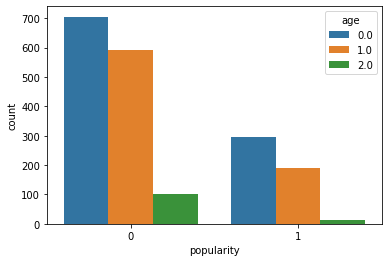

In [23]:
sns.countplot(x='popularity', hue='age', data=data)

### Height and weight

In [24]:
#fill missing age, height and weight for each gender
data['height'].fillna(data.groupby('gender')['height'].transform("median"), inplace=True)    
data['weight'].fillna(data.groupby('gender')['weight'].transform("median"), inplace=True)

In [25]:
data.loc[data['height']<=165,'height'] = 0,
data.loc[(data['height']>165)&(data['height']<=177),'height'] = 1,
data.loc[data['height']>177,'height'] = 2

In [26]:
test.loc[test['height']<=165,'height'] = 0,
test.loc[(test['height']>165)&(test['height']<=177),'height'] = 1,
test.loc[test['height']>177,'height'] = 2

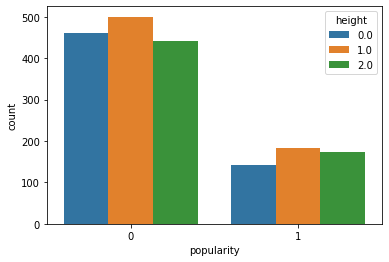

In [27]:
sns.countplot(x='popularity', hue='height', data=data)

In [28]:
data.loc[data['weight']<=55,'weight'] = 0,
data.loc[(data['weight']>55)&(data['weight']<=65),'weight'] = 1,
data.loc[data['weight']>65,'weight'] = 2

In [29]:
test.loc[test['weight']<=55,'weight'] = 0,
test.loc[(test['weight']>55)&(test['weight']<=65),'weight'] = 1,
test.loc[test['weight']>65,'weight'] = 2

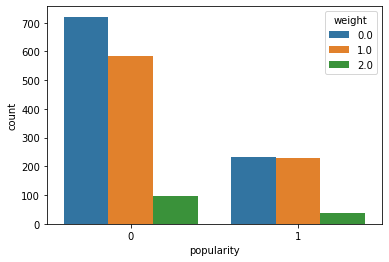

In [30]:
sns.countplot(x='popularity', hue='weight', data=data)

In [31]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,1.0,0.0,0.0,NaN,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,NaN,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,0.0,0.0,0.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,NaN,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,0.0,1.0,1.0,NaN,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,NaN,India,Main Vocalist,0,0


### Blood type

In [32]:
#change values of Blood type column and fill NaN values for each gender
bloodtype_map = {"O": 1, "A": 2, "B": 3, "AB": 4}
data['blood type']= data['blood type'].map(bloodtype_map)
data['blood type'].fillna(data.groupby('gender')['blood type'].transform("median"), inplace=True)    

In [33]:
#change values of Blood type column 
bloodtype_map = {"O": 1, "A": 2, "B": 3, "AB": 4}
test['blood type']= test['blood type'].map(bloodtype_map)

In [34]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,1.0,0.0,0.0,2.0,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,0.0,0.0,0.0,1.0,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,0.0,1.0,1.0,2.0,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,India,Main Vocalist,0,0


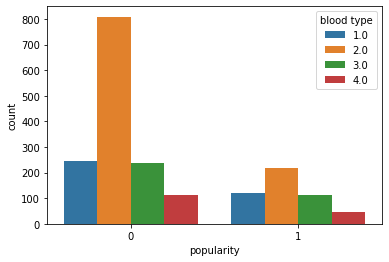

In [35]:
sns.countplot(x='popularity', hue='blood type', data=data)

### Position

In [36]:
#fill missing values of position 
data['position'] = data['position'].fillna("0")

In [37]:
#identify three main positions
for i, j in data.iterrows():
    d = data['position'][i]
    if "Rapper" in d:
        data.at[i, 'position'] = "Rapper" 
    elif "Vocalist" in d:
        data.at[i, 'position'] = "Vocalist" 
    else:
        data.at[i, 'position'] = "Other"

In [38]:
#fill missing values of position 
test['position'] = test['position'].fillna("0")

In [39]:
#identify three main positions
for i, j in test.iterrows():
    d = test['position'][i]
    if "Vocalist" in d:
        test.at[i, 'position'] = "Vocalist" 
    elif "Rapper" in d:
        test.at[i, 'position'] = "Rapper" 
    else:
        test.at[i, 'position'] = "Other"

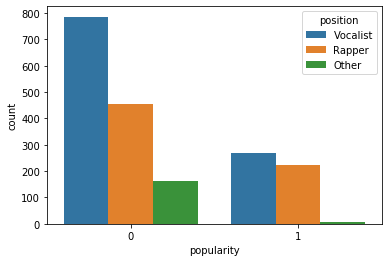

In [40]:
sns.countplot(x='popularity', hue='position', data=data)

Vocalists are the most popular

In [41]:
#change values of position column
position_map = {"Vocalist": 1, "Rapper": 2, "Other": 3}
data['position']= data['position'].map(position_map)

In [42]:
#change values of position column
position_map = {"Vocalist": 1, "Rapper": 2, "Other": 3}
test['position']= test['position'].map(position_map)

In [43]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,1.0,0.0,0.0,2.0,South Korea,1,1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,0.0,0.0,2.0,South Korea,1,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,0.0,0.0,0.0,1.0,Indonesia,2,1,0
7,8,Roy,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,Vietnam,1,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,0.0,1.0,1.0,2.0,Philippines,1,0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,2.0,1.0,2.0,India,1,0,0


### Country

In [44]:
#fill missing values of countries 
data["country"].fillna(method ='ffill', inplace = True) 

In [45]:
#create bar chart for country
def bar_chart(dt):
    popular = data[data['popularity']==1][dt].value_counts()
    unpopular = data[data['popularity']==0][dt].value_counts()
    df = pd.DataFrame([popular,unpopular])
    df.index = ['Popular','Unpopular']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

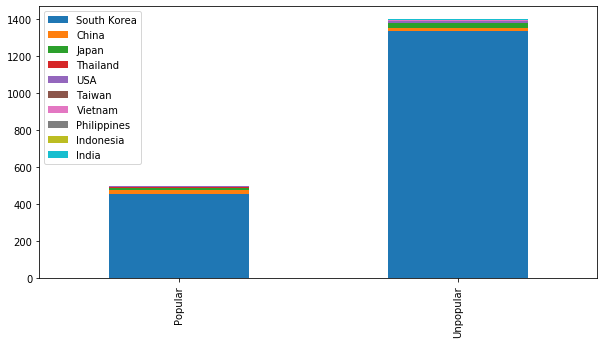

In [46]:
bar_chart('country')

Most popular idols from South Korea

In [47]:
country_map = {"South Korea": 1, "China": 0, "Japan": 0, "Taiwan": 0, "India": 0,  "USA": 0, "Thailand": 0, "Vietnam": 0, "Indonesia": 0, "Philippines": 0}
data['country'] = data['country'].map(country_map)
test['country'] = test['country'].map(country_map)

In [48]:
#drop colums
to_drop = ['agency', 'name', 'group', 'rank']
data = data.drop(to_drop, axis=1)

In [49]:
to_drop = ['agency', 'group', 'rank', 'real name', 'origin', 'industry']
test = test.drop(to_drop, axis=1)

In [50]:
test.head(10)

,name,age,height,weight,blood type,country,position,gender
0,Peak,0,2,2,2,0,3,0
1,Son Dong Pyo,0,1,0,1,1,1,0
2,Lee Jun Hyuk,0,2,1,3,1,1,0
3,Lee Hwan,0,1,0,2,1,1,0
4,Yoon Seo Hyeung,0,0,0,3,1,3,1
5,Uehera Jun,0,1,1,3,0,3,0
6,Park Ga Eul,0,0,0,3,1,3,1
7,Yim Kyung Ha,0,0,0,4,1,1,1
8,Lee Eugene,0,1,1,2,1,3,0
9,Lim Hoy Sun,0,1,0,1,1,2,1


# 3. Feature Engineering

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [52]:
X_train = data.drop("popularity", axis=1)
Y_train = data["popularity"]
X_test  = test.drop("name", axis=1).copy()

### Random Forest

In [53]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
prediction = rf.predict(X_test)
rf.score(X_train, Y_train)
accuracy_rf = round(rf.score(X_train, Y_train) * 100, 2)

### Logistic regression

In [54]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)
prediction = logreg.predict(X_test)
accuracy_lr = round(logreg.score(X_train, Y_train) * 100, 2)

### Decision tree

In [55]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
prediction = dtree.predict(X_test)
accuracy_dt = round(dtree.score(X_train, Y_train) * 100, 2)

### Model evaluation

In [56]:
res = pd.DataFrame({
    'Model': ['Random Forest',
             'Logistic Regression',
             'Decision Tree'],
    'Score': [accuracy_rf,
             accuracy_lr,
             accuracy_dt]})

In [57]:
score = res.sort_values(by='Score', ascending=False)
score = score.set_index('Score')
score.head()

,Model
Score,
77.01,Random Forest
77.01,Decision Tree
73.28,Logistic Regression


### Feature importance

In [58]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(8)

,importance
feature,
blood type,0.242
position,0.221
age,0.172
height,0.120
weight,0.116
country,0.093
gender,0.036


### Testing

In [59]:
test_data = test.drop('name', axis=1).copy()

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
prediction = rf.predict(X_test)

In [60]:
submission = pd.DataFrame({
        "name": test["name"],
        "popularity": prediction
    })

In [61]:
submission.to_csv('datasets/submission.csv', index=False)
submission = pd.read_csv('datasets/submission.csv')
submission.head(66)

,name,popularity
0,Peak,0
1,Son Dong Pyo,0
2,Lee Jun Hyuk,1
3,Lee Hwan,0
4,Yoon Seo Hyeung,0
...,...,...
61,Kang Hyeon Su,0
62,Lee Mi Dam,1
63,Jung Myung Hoon,0
64,Kim Yeon Kyeong,0


### Cross validation

In [62]:
rf = RandomForestClassifier(n_estimators=100)
score = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Score:", score)
print("Mean:", score.mean())
print("Standard Deviation:", score.std())

Score: [0.64397906 0.71052632 0.74210526 0.74210526 0.69473684 0.74210526
 0.68947368 0.74736842 0.74210526 0.72105263]
Mean: 0.7175558004960044
Standard Deviation: 0.03175529169885317


# 4. Conclusion

We started with the data analysis where we got information about missing data and learned which features are important. The next step is Data Preprocessing. During this part we computed missing values, converted values into numeric ones, grouped values into categories and created new column. Then we started our Feature Engineering part. We trained 3 different Machine Learning models(Random Forest, Decision Tree, Logistic Regression) and chosed one. As you can see The Random Forest on the first place in our model evaluation. Moreover, we determined important feature of our dataset. After that we performed testing. For each person in the test set, we used the model trained before to predict whether or not they will be popular. We included submission.csv, a set of predictions that shows us name and popularity. The last but not the least is Cross validation. We applied it and got score, its mean and standard deviation.